In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.api import qqplot

In [2]:
# Set up working directory

os.chdir('/Users/joanne/Desktop/WGU/D208/Medical Data')
os.getcwd()

'/Users/joanne/Desktop/WGU/D208/Medical Data'

In [3]:
# Load csv file and make dataframe
df = pd.read_csv('medical_clean.csv')

# Setting to display all columns
pd.set_option('display.max_columns', None)

# Shows first five rows to confirm dataframe has loaded
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Variables at a Glance

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Observations:
 - No null values
 - Several object types
 - Items1 - Item8 could be renamed for specificity

# Data Cleaning and Preparation

### Checking for Nulls/NAs
Confirmed in dictionary that there are no values that should be entered as 'None'

In [9]:
# Look for number of rows with minimum of one missing value
(df.isnull().sum(axis=1) > 0).sum()

0

In [10]:
# Double check nulls for each row
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

### Check for Duplicates

In [12]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

### Compare Unique Value Samples Against Dictionary

In [14]:
# Check unique values against dictionary
for col in df:
    print(col, ':', df[col].unique())

CaseOrder : [    1     2     3 ...  9998  9999 10000]
Customer_id : ['C412403' 'Z919181' 'F995323' ... 'R778890' 'E344109' 'I569847']
Interaction : ['8cd49b13-f45a-4b47-a2bd-173ffa932c2f'
 'd2450b70-0337-4406-bdbb-bc1037f1734c'
 'a2057123-abf5-4a2c-abad-8ffe33512562' ...
 '1d79569d-8e0f-4180-a207-d67ee4527d26'
 'f5a68e69-2a60-409b-a92f-ac0847b27db0'
 'bc482c02-f8c9-4423-99de-3db5e62a18d5']
UID : ['3a83ddb66e2ae73798bdf1d705dc0932' '176354c5eef714957d486009feabf195'
 'e19a0fa00aeda885b8a436757e889bc9' ... '41b770aeee97a5b9e7f69c906a8119d7'
 '2bb491ef5b1beb1fed758cc6885c167a' '95663a202338000abdf7e09311c2a8a1']
City : ['Eva' 'Marianna' 'Sioux Falls' ... 'Milmay' 'Quinn' 'Coraopolis']
State : ['AL' 'FL' 'SD' 'MN' 'VA' 'OK' 'OH' 'MS' 'WI' 'IA' 'CA' 'IN' 'MO' 'MI'
 'NE' 'PA' 'AR' 'WV' 'KS' 'MA' 'KY' 'NY' 'VT' 'DC' 'IL' 'ND' 'SC' 'AK'
 'NM' 'NH' 'GA' 'NC' 'MD' 'TN' 'WA' 'TX' 'CO' 'NJ' 'LA' 'OR' 'AZ' 'ME'
 'ID' 'UT' 'RI' 'MT' 'PR' 'NV' 'CT' 'HI' 'WY' 'DE']
County : ['Morgan' 'Jackson' 'Minneh

### Specify Survey Variable Names 
Change from 'Item...' to respective dictionary names

In [16]:
# Establish dictionary to map survey names
name_dict = {'Item1': 'TimelyAdmission', 'Item2':'TimelyTreatment', 'Item3':'TimelyVisits', 'Item4':'Reliability', 'Item5':'Options', 'Item6':'TreatmentHours', 
             'Item7':'CourteousStaff', 'Item8':'ActiveListening'}

# Rename the dataframe and change the variable names so it persists
df.rename(columns=name_dict, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Look at Outliers Among Quantitative Variables
Generate box plots to identify outliers quickly and then individually examine them to determine treatment.

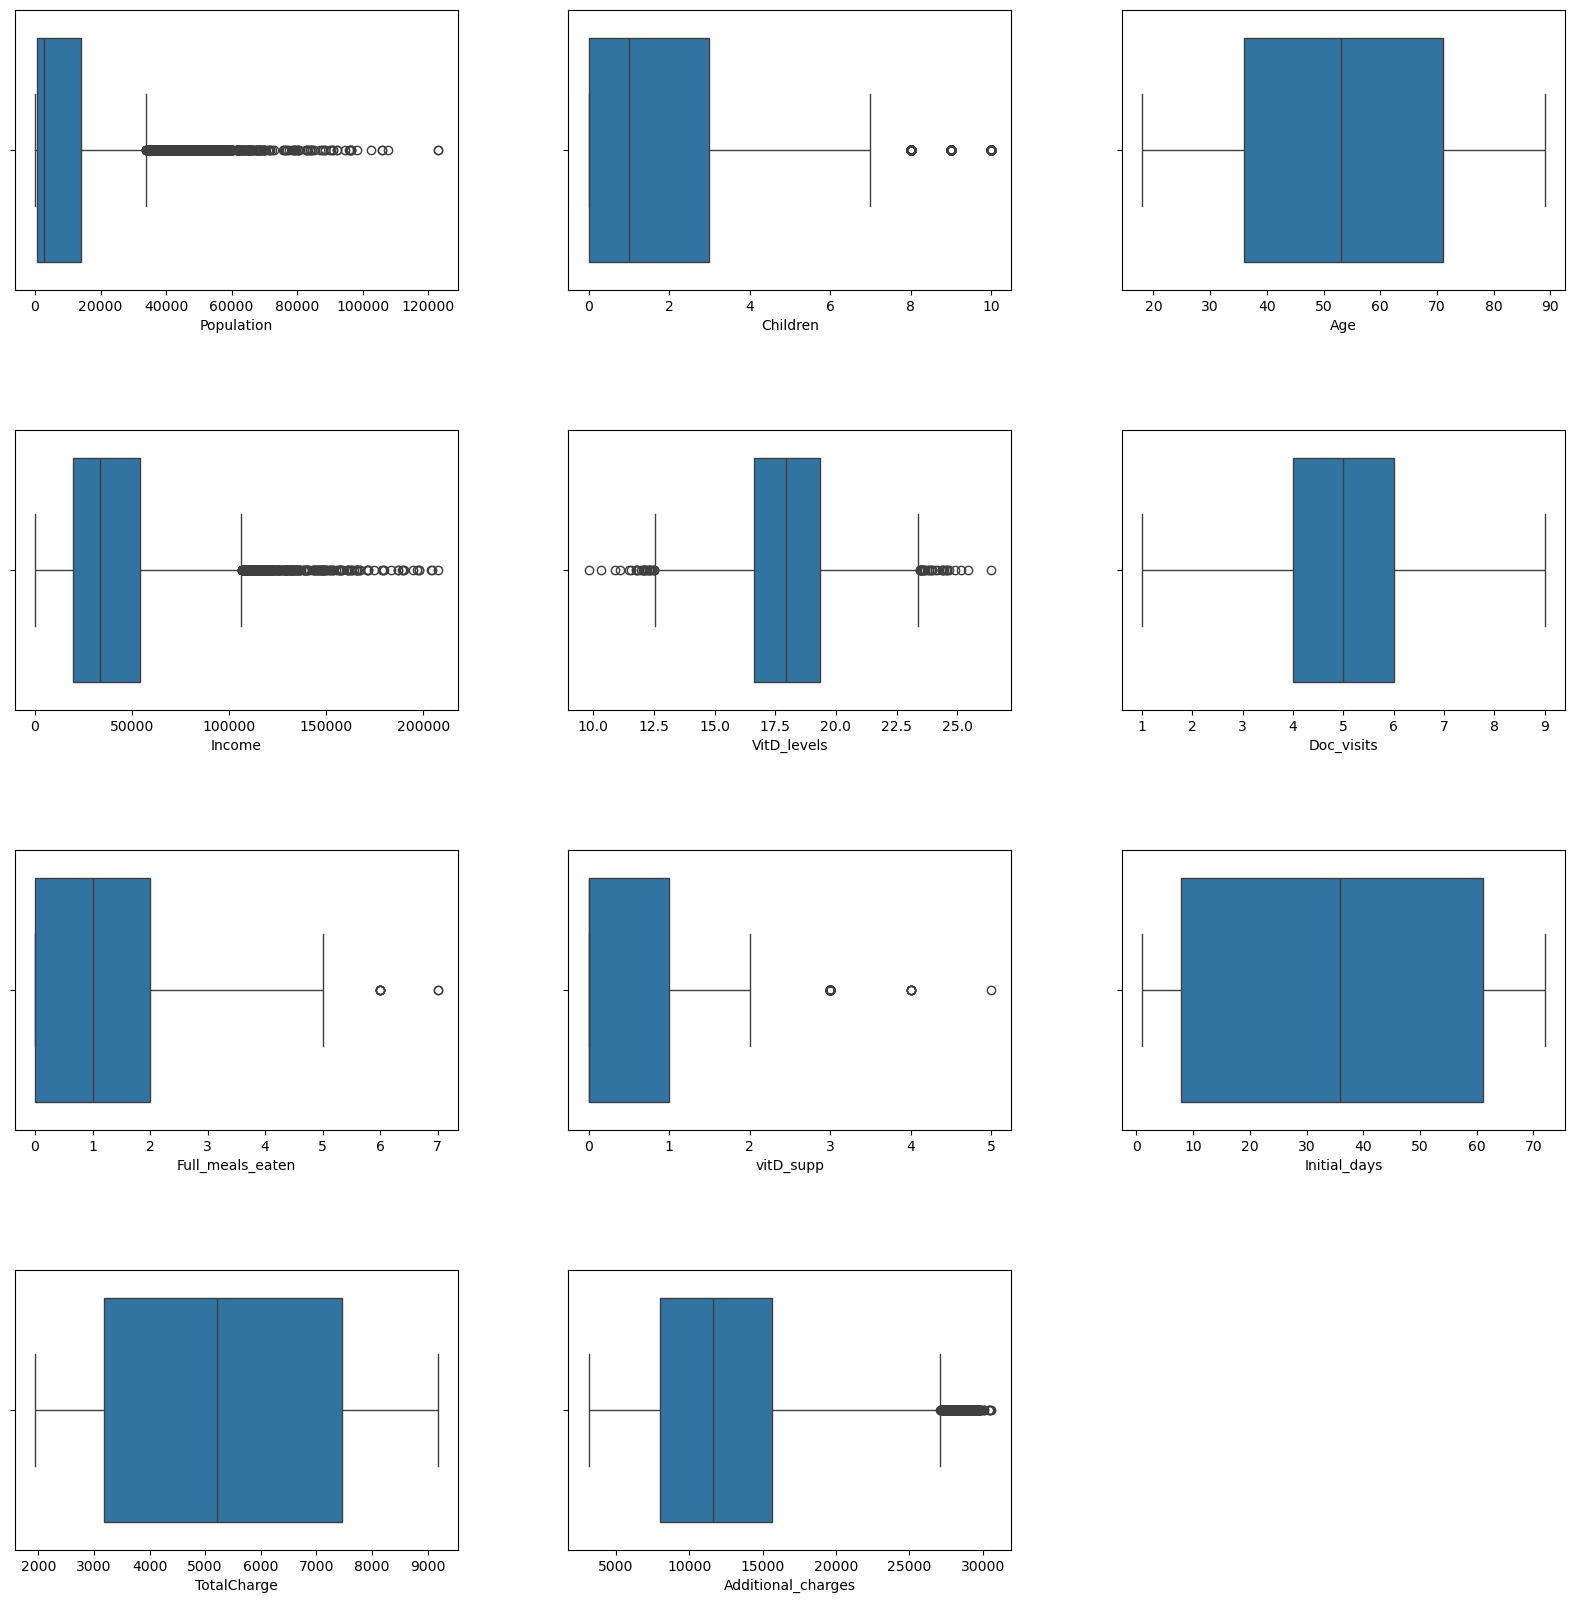

In [18]:
cont_var = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 
            'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# Set figure options
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=.5, wspace=.25)

# For loop over list of variables to generate box plots
for var, ax in zip(cont_var, axes.flat):
    ax.set_label(var)
    sns.boxplot(data=df, x=var, ax=ax)
    
axes[3,2].remove() # Removes unused chart
# Show figure
plt.show()

### Outlier Observations
Population, Children, Income, VitD_levels, Full_meals_eaten, vitD_supp, and Additional_charges show outliers. We should look at the minimum and maximum values to understand whether these are worth keeping or imputing. 

### Outlier Consideration

In [21]:
cont_var = ['Population', 'Children', 'Income', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Additional_charges']
df[cont_var].describe()

,Population,Children,Income,VitD_levels,Full_meals_eaten,vitD_supp,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9965.253800,2.097200,40490.495160,17.964262,1.001400,0.398900,12934.528587
std,14824.758614,2.163659,28521.153293,2.017231,1.008117,0.628505,6542.601544
min,0.000000,0.000000,154.080000,9.806483,0.000000,0.000000,3125.703000
25%,694.750000,0.000000,19598.775000,16.626439,0.000000,0.000000,7986.487755
50%,2769.000000,1.000000,33768.420000,17.951122,1.000000,0.000000,11573.977735
75%,13945.000000,3.000000,54296.402500,19.347963,2.000000,1.000000,15626.490000
max,122814.000000,10.000000,207249.100000,26.394449,7.000000,5.000000,30566.070000


### Population Outliers
The dictionary definition for Population is the population within a one-mile radius of a patient's residence. The outliers are outside the upper limit with a max of 122,814. This maximum populations sounds realistic, especially within an highly dense urban area. We are going to keep population unchanged. 

### Children Outliers
Something to note is that children is self-reported demographic information that can contribute in the analysis since we are looking at how patient demographic information influence length of hospital stay. Let's see how many observations are outside the upper limit below.

In [24]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Children'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)

# Set variable for count
upper_count = 0

# Count outliers in Population
for x in df['Children']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

obs_perc = upper_count/len(df)
print('Percentage of dataset: {:.1%}'.format(obs_perc))


Upper Outliers: 411
Percentage of dataset: 4.1%


About 400 patients in the dataset have at least 7 or more children (4.1% of the sample). This sounds like a realistic number with self-reported data, so we will keep these outliers.

### Income Outliers
This variable has the widest range of values with minimum of 154 and maximum of 207,249. 
An explanation for the minimum income could be that patient has reported unemployment benefits. 
On the maximum end, it's possible for someone to earn above 200,000. 
The outliers are outside the upper limit so let's count how many there are.

In [27]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Income'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)

# Set variable for count
upper_count = 0

# Count outliers in Population
for x in df['Income']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

obs_perc = upper_count/len(df)
print('Percentage of dataset: {:.1%}'.format(obs_perc))
print(df['Income'].nlargest(n=upper_count))

Upper Outliers: 326
Percentage of dataset: 3.3%
8386    207249.10
841     204542.41
8598    203774.60
6406    197675.00
1778    197576.18
          ...    
9791    106692.90
7391    106691.20
4027    106671.88
9596    106592.60
957     106521.92
Name: Income, Length: 326, dtype: float64


Outliers start at 106,521 to the maximum 207,249. These are realistic salaries and self-reported data. So we will keep Income the same.

### Vitamin D Levels Outliers
This is self-reported patient data and minimum and maximum Vitamin D levels are considered realistic. Minimum of 9, is considered a Vitamin D deficiency, and max value of 26 is considered adequate Vitamin D. The outliers for Vitamin D levels will stay.

### Full Meals Eaten Outliers

In [31]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Full_meals_eaten'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)

# Set variable for count
upper_count = 0

# Count outliers in Population
for x in df['Full_meals_eaten']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

obs_perc = upper_count/len(df)
print('Percentage of dataset: {:.1%}'.format(obs_perc))
print(df['Full_meals_eaten'].nlargest(n=upper_count))

Upper Outliers: 8
Percentage of dataset: 0.1%
958     7
4709    7
1231    6
2184    6
6068    6
7217    6
8144    6
9986    6
Name: Full_meals_eaten, dtype: int64


The minimum of zero also includes half-meals and the maximum of 7 in one day is realistic given the few number of outliers. The size of meals are unclear, perhaps patients that ate more frequently ate smaller-sized meals. This could be condition-related. We will keep it as medical data.

### Vitamin D Support Outliers

In [34]:
df['vitD_supp'].value_counts()

vitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

Vitamin D is patient medical information provided by the hospital. The dictionary is unclear on the time interval of administering these vitamin D supplements. If we look at the value counts, we see that outliers outside the upper limit (2) is 70. This is a realistic number of patients given there are some patients with inadequate Vitamin D levels. We will keep this variable.


### Additional Charges Outliers
Additional charges are the average amount charged to the patient for miscellaneous treatments.

Minimum value and maximum values are realistic since there is a wide range of treatments that a patient can undergo during hospitalization even though we do not know what that list entails. Insurance co-pays and premiums would also factor into the difference between the minimum and maximum values. This number per observation (patient) is also an average, so inconsistency is based on several factors such as days in hospital, treatment types, and patient medical condition. We will keep this data unchanged.

# Creating DataFrame for Selected Variables
 - Dependent Variable: 'Initial_days'
 - Independent Variables: 
     - 'VitD_levels'
     - 'TotalCharge'
     - 'Age'
     - 'Doc_visits'
     - 'Full_meals_eaten'
     - 'Complication_risk'
     - 'Initial_admin'
     - 'Services'
     - 'Soft_drink'
     - 'HighBlood'
     - 'Overweight'
     - 'Arthritis'
     - 'Diabetes'
     - 'BackPain'
     - 'Reflux_esophagitis'
     - 'Asthma'

In [39]:
# Create array of selected variables
variables_to_model = ['Initial_days', 'VitD_levels','TotalCharge','Age', 'Doc_visits', 'Full_meals_eaten','Complication_risk', 
                      'Initial_admin', 'Services', 'Soft_drink', 'HighBlood', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain',
                      'Reflux_esophagitis', 'Asthma']

# Establish a separate dataframe
df = df[variables_to_model]

# Check that all variables are in new dataframe
df.head()

,Initial_days,VitD_levels,TotalCharge,Age,Doc_visits,Full_meals_eaten,Complication_risk,Initial_admin,Services,Soft_drink,HighBlood,Overweight,Arthritis,Diabetes,BackPain,Reflux_esophagitis,Asthma
0,10.585770,19.141466,3726.702860,53,6,0,Medium,Emergency Admission,Blood Work,No,Yes,No,Yes,Yes,Yes,No,Yes
1,15.129562,18.940352,4193.190458,51,4,2,High,Emergency Admission,Intravenous,No,Yes,Yes,No,No,No,Yes,No
2,4.772177,18.057507,2434.234222,53,4,1,Medium,Elective Admission,Blood Work,No,Yes,Yes,No,Yes,No,No,No
3,1.714879,16.576858,2127.830423,78,4,1,Medium,Elective Admission,Blood Work,No,No,No,Yes,No,No,Yes,Yes
4,1.254807,17.439069,2113.073274,22,5,0,Low,Elective Admission,CT Scan,Yes,No,No,No,No,No,No,No


# Summary Statistics

## Summary Statistics - Response Variable

In [42]:
## Dependent Variable Summary Statistics
df[['Initial_days']].describe()

,Initial_days
count,10000.000000
mean,34.455299
std,26.309341
min,1.001981
25%,7.896215
50%,35.836244
75%,61.161020
max,71.981490


## Summary Statistics - Numeric Explanatory Variables

In [44]:
df[['VitD_levels','TotalCharge','Age', 'Doc_visits', 'Full_meals_eaten']].describe()

,VitD_levels,TotalCharge,Age,Doc_visits,Full_meals_eaten
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,17.964262,5312.172769,53.511700,5.012200,1.001400
std,2.017231,2180.393838,20.638538,1.045734,1.008117
min,9.806483,1938.312067,18.000000,1.000000,0.000000
25%,16.626439,3179.374015,36.000000,4.000000,0.000000
50%,17.951122,5213.952000,53.000000,5.000000,1.000000
75%,19.347963,7459.699750,71.000000,6.000000,2.000000
max,26.394449,9180.728000,89.000000,9.000000,7.000000


## Summary Statistics - Categorical Explanatory Variables

In [46]:
category_vars = ['Complication_risk', 'Initial_admin', 'Services', 'Soft_drink', 'HighBlood', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain',
    'Reflux_esophagitis', 'Asthma']


df[category_vars].describe()

,Complication_risk,Initial_admin,Services,Soft_drink,HighBlood,Overweight,Arthritis,Diabetes,BackPain,Reflux_esophagitis,Asthma
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,3,4,2,2,2,2,2,2,2,2
top,Medium,Emergency Admission,Blood Work,No,No,Yes,No,No,No,No,No
freq,4517,5060,5265,7425,5910,7094,6426,7262,5886,5865,7107


In [47]:
# Counts and Percentages
for col in df[category_vars]:
    counts = df[col].value_counts()
   
    percs = df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

    print("\n")
    print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))



                   count percentage
Complication_risk                  
Medium              4517      45.2%
High                3358      33.6%
Low                 2125      21.2%


                       count percentage
Initial_admin                          
Emergency Admission     5060      50.6%
Elective Admission      2504      25.0%
Observation Admission   2436      24.4%


             count percentage
Services                     
Blood Work    5265      52.6%
Intravenous   3130      31.3%
CT Scan       1225      12.2%
MRI            380       3.8%


            count percentage
Soft_drink                  
No           7425      74.2%
Yes          2575      25.8%


           count percentage
HighBlood                  
No          5910      59.1%
Yes         4090      40.9%


            count percentage
Overweight                  
Yes          7094      70.9%
No           2906      29.1%


           count percentage
Arthritis                  
No          6426      64.3

# Univariate and Bivariate Visualizations

## Univariate Visualization for Dependent | Response Variable

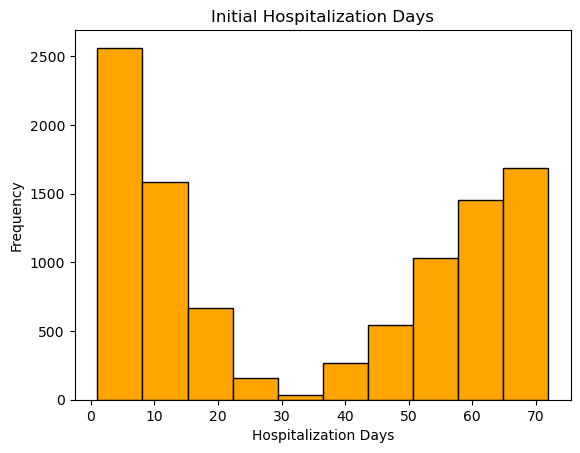

In [50]:
plt.hist(df['Initial_days'], color='orange', edgecolor='black')

plt.title('Initial Hospitalization Days')
plt.xlabel('Hospitalization Days')
plt.ylabel('Frequency')

plt.show()

## Univariate Bivariate Visualizations for Selected Continuous Variables

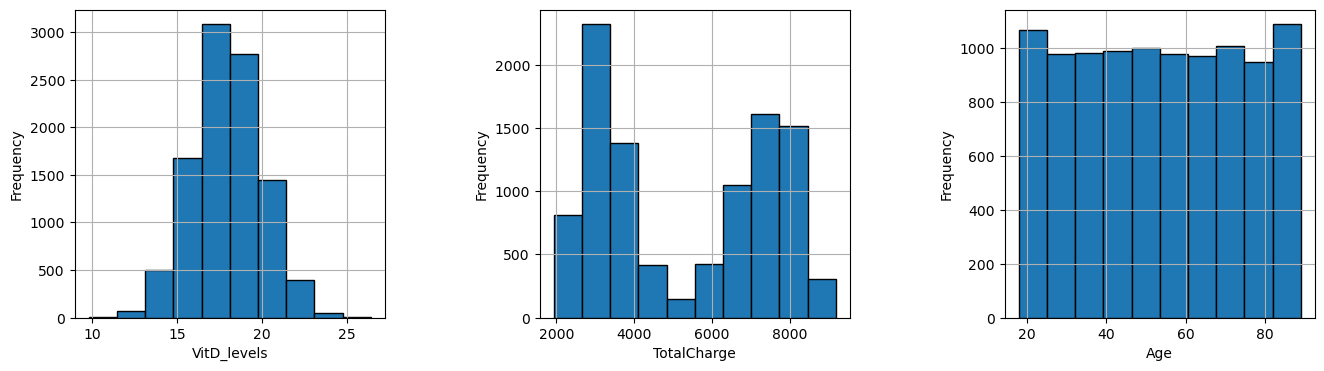

In [52]:
# Histograms for continuous variables

# Establish target continuous variables
cont_var = ['VitD_levels','TotalCharge', 'Age']

# Loop over list of variables to generate histograms
fig, (axes) = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(hspace= .25, wspace=.5)

for var, ax in zip(cont_var, axes.flat):
    ax.set_ylabel('Frequency')
    ax.set_xlabel(var)
    
    df[var].hist(ax=ax, edgecolor='black')

plt.show()

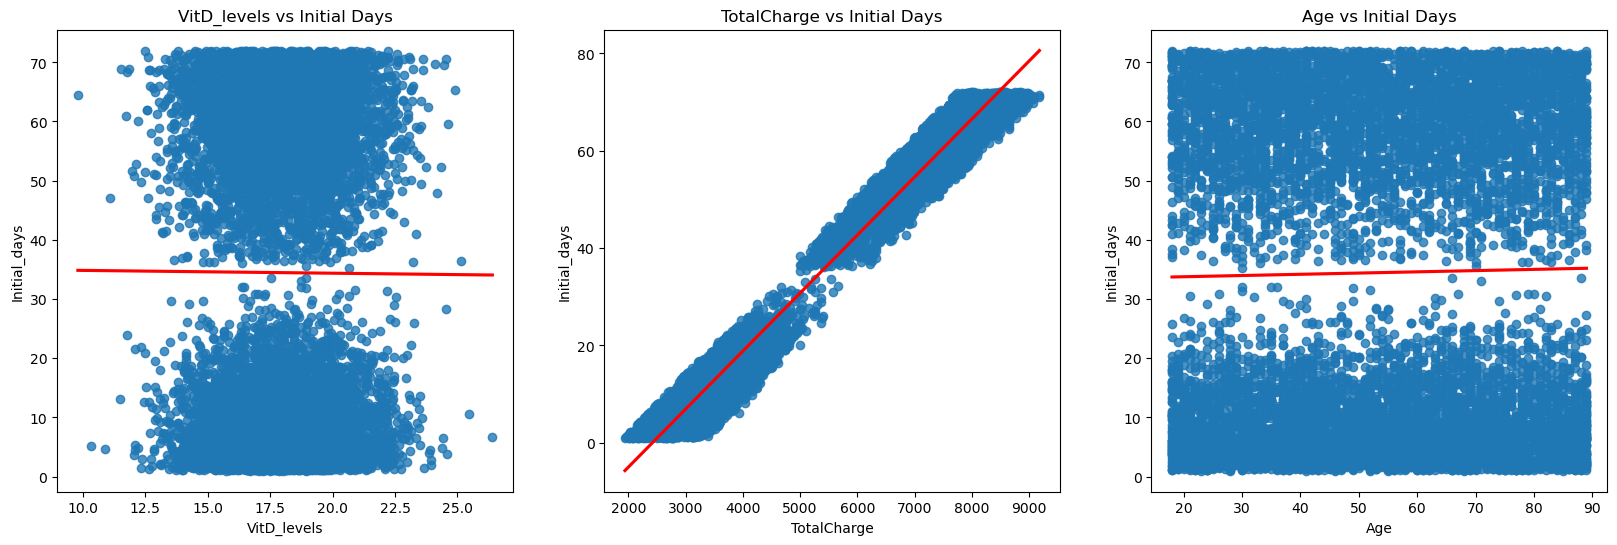

In [53]:
# Bivariate visualizations for continuous variables
fig, axes = plt.subplots(1,3, figsize=(20, 6))

# Loop over list of variables to generate scatterplots
for var, ax in zip(cont_var, axes.flat):
    labels = df[var].value_counts().index.tolist()
    count = df[var].value_counts().values.tolist()

    ax.set_title('{} vs Initial Days'.format(var))
    
    ax.set_ylabel('Initial Days')
    ax.set_xlabel(var)
    
    sns.regplot(ax=ax, x=var, y="Initial_days", data=df, line_kws={"color": "red"}, ci=None)

plt.show()

## Univariate Bivariate Visualizations for Selected Discrete Variables

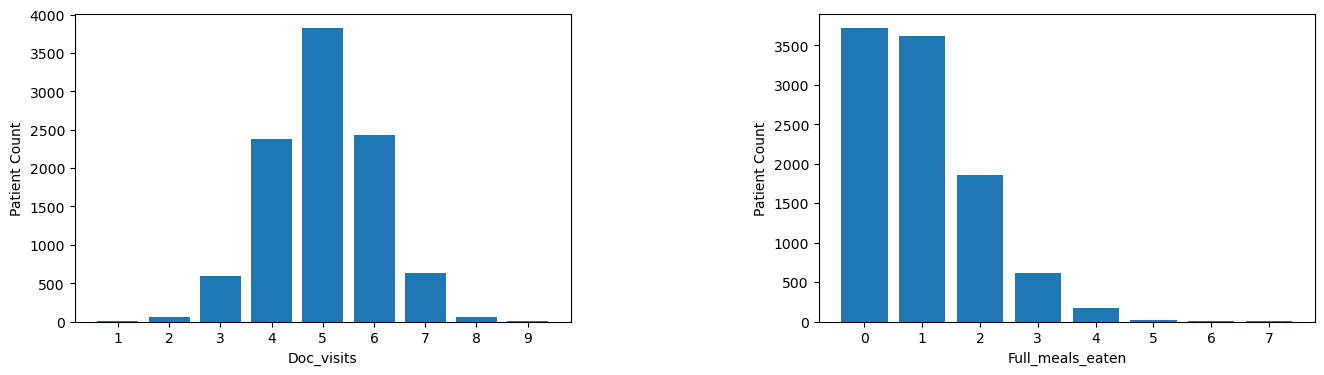

In [55]:
# Univariate bar plots for discrete values

# Establish target discrete variables
discrete_var = ['Doc_visits', 'Full_meals_eaten']

fig, (axes) = plt.subplots(1, 2, figsize=(16, 4))
fig.subplots_adjust(hspace=.25, wspace=.5)

# Loop over list of variables to generate histograms
for var, ax in zip(discrete_var, axes.flat):
    temp_dict = df[var].value_counts().sort_index().to_dict()
    names = list(temp_dict.keys())
    values = list(temp_dict.values())

    ax.set_ylabel('Patient Count')
    ax.set_xlabel(var)
    
    ax.bar(range(len(temp_dict)), values, tick_label=names)


plt.show()

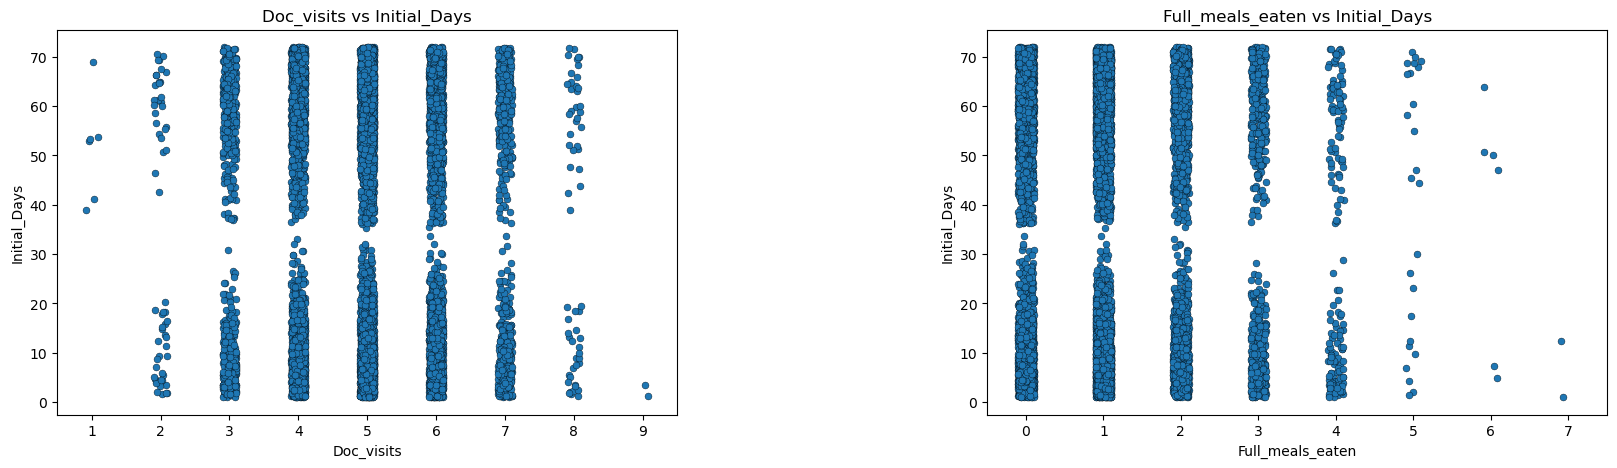

In [56]:
# Bivariate for discrete variables 

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.subplots_adjust(hspace=.5, wspace=.5)

# Loop over list of variables to generate scatterplots
for var, ax in zip(discrete_var, axes.flat):
    labels = df[var].value_counts().index.tolist()
    count = df[var].value_counts().values.tolist()

    ax.set_title('{} vs Initial_Days'.format(var))
    
    ax.set_ylabel('Initial_Days')
    ax.set_xlabel(var)
    
    sns.stripplot(data=df, x=var, y='Initial_days', ax=ax, jitter=True, edgecolor='black', linewidth=.25)
    
plt.show()

## Univariate Bivariate Visualizations for Selected Categorical Variables

In [58]:
# Frequency by Count of Bool Values

# Establish target categorical variables
cat_var = ['Complication_risk', 'Initial_admin', 'Services', 'Soft_drink', 'HighBlood', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain',
                   'Reflux_esophagitis', 'Asthma']



df[cat_var].describe()

,Complication_risk,Initial_admin,Services,Soft_drink,HighBlood,Overweight,Arthritis,Diabetes,BackPain,Reflux_esophagitis,Asthma
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,3,4,2,2,2,2,2,2,2,2
top,Medium,Emergency Admission,Blood Work,No,No,Yes,No,No,No,No,No
freq,4517,5060,5265,7425,5910,7094,6426,7262,5886,5865,7107


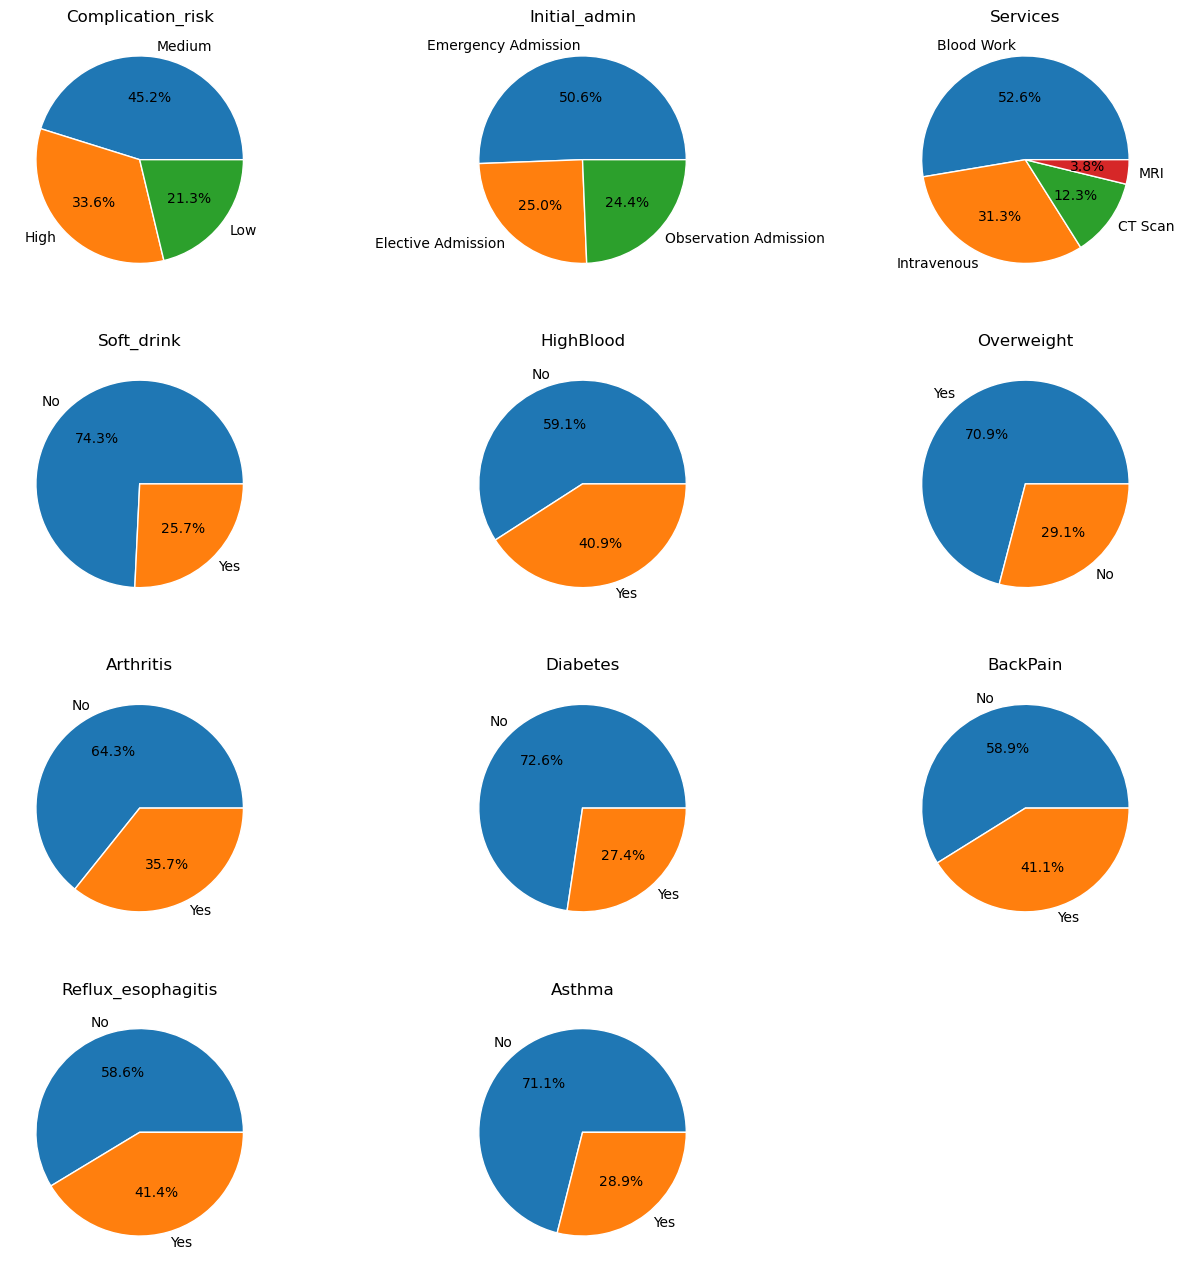

In [59]:
# Univariate for Categorical; By Percentage Frequency

# Establish figure and axes
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
fig.subplots_adjust(hspace=.25, wspace=.25)

# Loop over list of variables to generate pie charts
for var, ax in zip(cat_var, axes.flat):
    labels = df[var].value_counts().index.tolist()
    count = df[var].value_counts().values.tolist()
    
    ax.set_title(var)
    
    ax.pie(count, 
           labels=labels, 
           autopct='%1.1f%%', 
           wedgeprops = {"edgecolor" : "white", 
                          'linewidth': 1})
    
axes[3,2].remove() # Removes unused chart
plt.show()


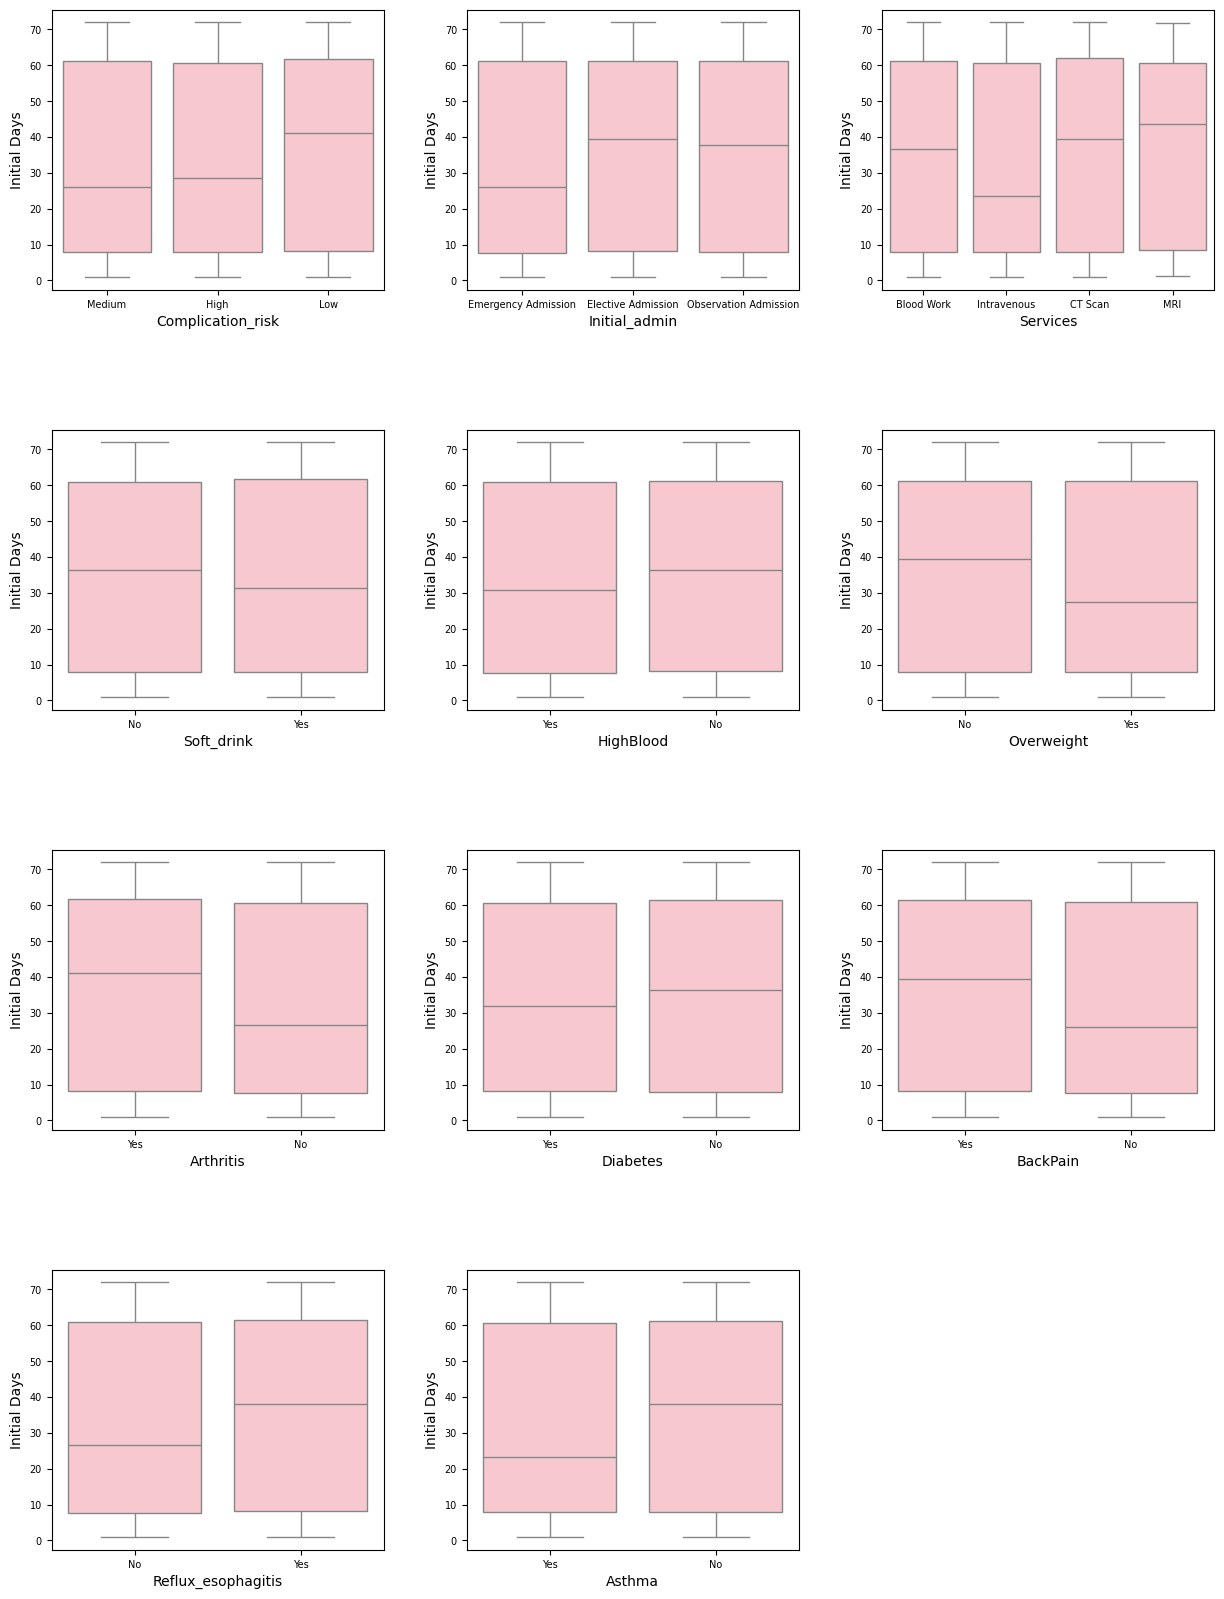

In [60]:
# Bivariate for categorical variables 

# Set figure options
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=.5, wspace=.25)

# For loop over list of variables to generate box plots
for var, ax in zip(cat_var, axes.flat):
    ax.set_ylabel("Initial Days")
    ax.set_label(var)
   
    
    sns.boxplot(data=df, x=var, y='Initial_days', color="pink", ax=ax)
    ax.tick_params(labelsize=7)
    
axes[3,2].remove() # Removes unused chart
# Show figure
plt.show()



# Data Wrangling

## Re-expression of Categorical Variables

In [63]:
# Establish list of variables for categorical re-expression
reexp_cols = ['Soft_drink', 'HighBlood', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain', 
              'Reflux_esophagitis', 'Asthma']

In [64]:
# New column names variable
new_col_list = [] 

# Function for looping through target columns to re-express 'Yes/No' to 1/0
for col in reexp_cols:
    # Make new name and duplicate original column
    new_col = col +'_numeric'
    df[new_col] = df[col]
    
    # Make dictionary to change boolean to numeric
    new_dict = {new_col: {'No': 0, 'Yes': 1}}
    
    # Change all values in duplicated columns to ordinal encoding
    df.replace(new_dict, inplace=True)
    
    # Add to new_col_list
    new_col_list.append(new_col)

# Check that numeric columns were created by filtering and printing them

numeric_cols = [var for var in df.columns if 'numeric' in var]
print(df[numeric_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Soft_drink_numeric          10000 non-null  int64
 1   HighBlood_numeric           10000 non-null  int64
 2   Overweight_numeric          10000 non-null  int64
 3   Arthritis_numeric           10000 non-null  int64
 4   Diabetes_numeric            10000 non-null  int64
 5   BackPain_numeric            10000 non-null  int64
 6   Reflux_esophagitis_numeric  10000 non-null  int64
 7   Asthma_numeric              10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB
None


In [65]:
# Show unique values in new_col_list
for col in new_col_list:
    print(col, df[col].unique())

Soft_drink_numeric [0 1]
HighBlood_numeric [1 0]
Overweight_numeric [0 1]
Arthritis_numeric [1 0]
Diabetes_numeric [1 0]
BackPain_numeric [1 0]
Reflux_esophagitis_numeric [0 1]
Asthma_numeric [1 0]


## One Hot Encoding; Get Dummy Variables

In [67]:
# Establish selection for dummy variable creation
target_dummy_vars = ['Initial_admin', 'Complication_risk', 'Services']
# Create dummy variables and drop one level to remove redundancy
dummies = pd.get_dummies(df[target_dummy_vars], prefix=target_dummy_vars, drop_first=True, dtype=int)

dummies.head()

,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_Low,Complication_risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
0,1,0,0,1,0,0,0
1,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0


In [68]:
# Add dummies columns to df and make change permanent by reassigning df
df = pd.concat([df, dummies], axis=1)

In [69]:
# Create array for generated dummy variables and check that they made it to the dataframe
dummy_vars = ['Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 
              'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']

print(df[dummy_vars].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Initial_admin_Emergency Admission    10000 non-null  int64
 1   Initial_admin_Observation Admission  10000 non-null  int64
 2   Complication_risk_Low                10000 non-null  int64
 3   Complication_risk_Medium             10000 non-null  int64
 4   Services_CT Scan                     10000 non-null  int64
 5   Services_Intravenous                 10000 non-null  int64
 6   Services_MRI                         10000 non-null  int64
dtypes: int64(7)
memory usage: 547.0 KB
None


In [70]:
vars_todrop = ['Complication_risk', 'Initial_admin', 'Services', 'Soft_drink', 'HighBlood', 'Overweight', 'Arthritis',
              'Arthritis', 'Diabetes', 'BackPain', 'Reflux_esophagitis', 'Asthma']
df.drop(vars_todrop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Initial_days                         10000 non-null  float64
 1   VitD_levels                          10000 non-null  float64
 2   TotalCharge                          10000 non-null  float64
 3   Age                                  10000 non-null  int64  
 4   Doc_visits                           10000 non-null  int64  
 5   Full_meals_eaten                     10000 non-null  int64  
 6   Soft_drink_numeric                   10000 non-null  int64  
 7   HighBlood_numeric                    10000 non-null  int64  
 8   Overweight_numeric                   10000 non-null  int64  
 9   Arthritis_numeric                    10000 non-null  int64  
 10  Diabetes_numeric                     10000 non-null  int64  
 11  BackPain_numeric             

## Check linearity
We will check linearity for selected and transformed variables to see if we meet the linearity assumption.

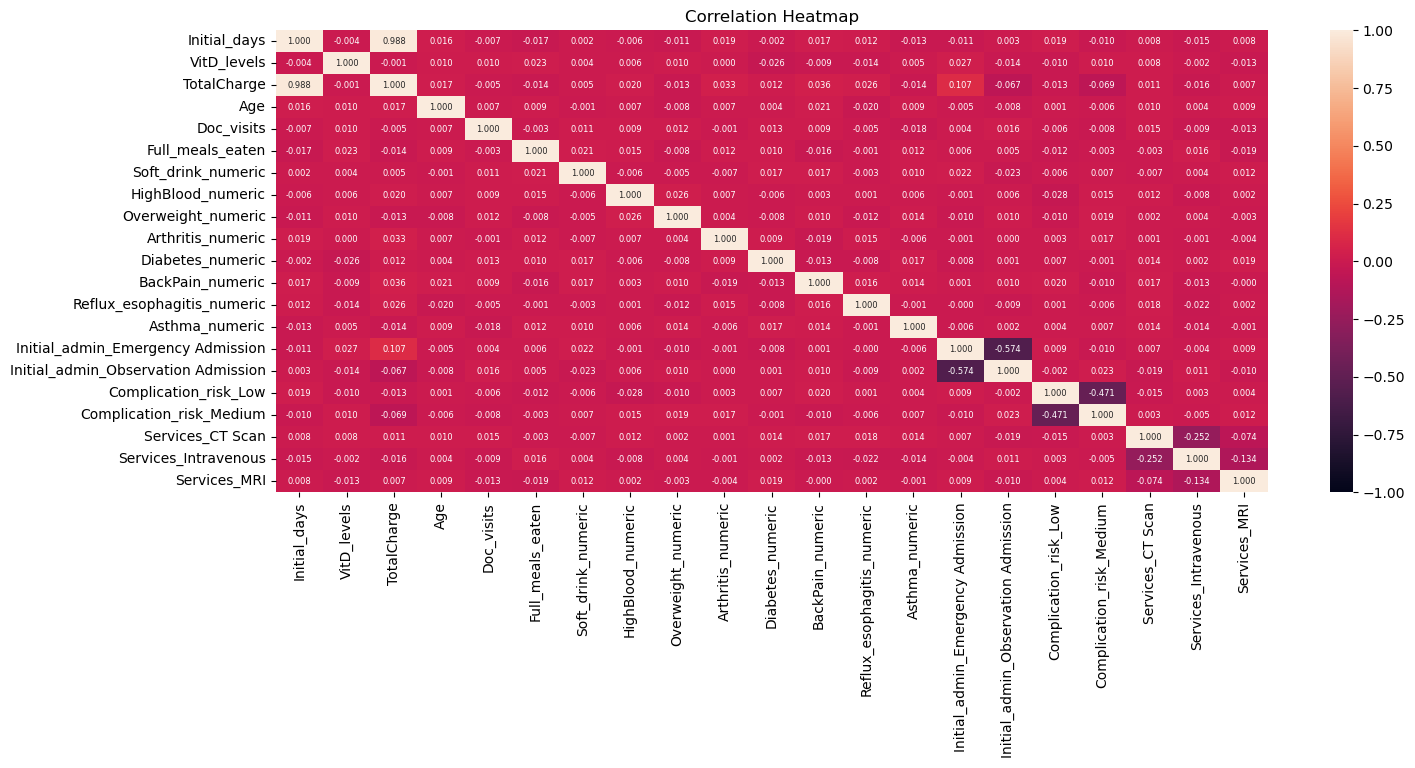

In [72]:
# Create Correlation Heat Map 
plt.figure(figsize=(16, 6))
plt.title('Correlation Heatmap')

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.3f', annot_kws={"size": 6})
plt.show()


Based on the correlation rules below, Initial_days do not exhibit strong linear correlations to the selected variables except for one variable, 'TotalCharge'. The other variables fall in the 'Little if any correlation' category. Linear regression assumes that explanatory variables have a linear relationship with the response variable. At this point, we can assume that our forthcoming model may be innaccurate. 

``` if statistic >= .90: 
    print('Correlation coefficient indicates a very strong relationship between target variables')
elif statistic >= .70:
    print('Correlation coefficient indicates a strong relationship between target variables')
elif staitistic >= .50:
    print('Correlation coefficient indicates a moderate relationship between target variables')
elif statistic >= .30:
    print('Correlation coefficient indicates a weak relationship between target variables')
else:
    print('Little if any correlation') ```


In [74]:
# Generate csv file for submission
df.to_csv('Cleaned_Wrangled_MLR_Dataframe.csv')

# Regression Models

## Initial Model

Generate the first and model to make the initial observations.

In [78]:
# Establish the explanatory columns
expl_cols = df[['VitD_levels','TotalCharge','Age', 'Doc_visits', 'Full_meals_eaten', 'Complication_risk_Low', 
                'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 
                'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Soft_drink_numeric', 'HighBlood_numeric', 
                'Overweight_numeric', 'Arthritis_numeric', 'Diabetes_numeric', 'BackPain_numeric', 'Reflux_esophagitis_numeric', 
                'Asthma_numeric']]

In [79]:
y = df[['Initial_days']]
X = expl_cols.assign(const=1)

model_A = sm.OLS(y, X).fit()

print(model_A.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.271e+05
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:25:57   Log-Likelihood:                -12070.
No. Observations:               10000   AIC:                         2.418e+04
Df Residuals:                    9979   BIC:                         2.433e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Vi

The summary shows an adjusted R-squared value of .999. But it's also known that many of variables do not have a linear relationship with the response variables. Additionally, one of the limits of r-squared value is that it always goes up when there are a lot of explanatory variables. There is also an error for multicollinearity so we need to check the variance inflation factors of each variable and check if any surpasses a threshold of 10 or more.

### Addressing Multicollinearity

In [82]:
X = expl_cols

# Create dataframe to load variable name and VIF scores
vif_df = pd.DataFrame()

# Create column called feature to list all variables
vif_df["feature"] = X.columns
# Creates column called 'VIF' to list all corresponding VIF scores

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
 
# vif_df = vif_df.set_index('feature')
print(vif_df)

                                feature        VIF
0                           VitD_levels  31.116574
1                           TotalCharge   6.769467
2                                   Age   7.376655
3                            Doc_visits  19.882159
4                      Full_meals_eaten   1.983054
5                 Complication_risk_Low   1.619661
6              Complication_risk_Medium   2.327733
7     Initial_admin_Emergency Admission   3.016369
8   Initial_admin_Observation Admission   1.952083
9                      Services_CT Scan   1.233109
10                 Services_Intravenous   1.585808
11                         Services_MRI   1.072191
12                   Soft_drink_numeric   1.347784
13                    HighBlood_numeric   1.691125
14                   Overweight_numeric   3.392016
15                    Arthritis_numeric   1.556067
16                     Diabetes_numeric   1.375266
17                     BackPain_numeric   1.700139
18           Reflux_esophagitis

Instead of running a loop, let's remove the highest VIF per observation drop in its dataframe and see if anything changes. We will do it this way so we can determine the level of multicollinearity to elimiate vs. tolerate.

In [84]:
#print(vif_df)
max_val = vif_df['VIF'].max()
max_name = vif_df['feature'][vif_df['VIF'] == max_val].values[0]
max_index = vif_df['feature'][vif_df['VIF'] == max_val].index[0]
print(max_val, max_name, max_index)


vif_df.drop(max_index, inplace=True)
print(vif_df)

31.116573985614444 VitD_levels 0
                                feature        VIF
1                           TotalCharge   6.769467
2                                   Age   7.376655
3                            Doc_visits  19.882159
4                      Full_meals_eaten   1.983054
5                 Complication_risk_Low   1.619661
6              Complication_risk_Medium   2.327733
7     Initial_admin_Emergency Admission   3.016369
8   Initial_admin_Observation Admission   1.952083
9                      Services_CT Scan   1.233109
10                 Services_Intravenous   1.585808
11                         Services_MRI   1.072191
12                   Soft_drink_numeric   1.347784
13                    HighBlood_numeric   1.691125
14                   Overweight_numeric   3.392016
15                    Arthritis_numeric   1.556067
16                     Diabetes_numeric   1.375266
17                     BackPain_numeric   1.700139
18           Reflux_esophagitis_numeric   1.69583

Above we removed VitD_levels because it showed extremely high multicollinearity among other explanatory variables. The next highest VIF is Doc_visits and we will run the drop method again and check remaining VIFs.

In [86]:
max_val = vif_df['VIF'].max()
max_name = vif_df['feature'][vif_df['VIF'] == max_val].values[0]
max_index = vif_df['feature'][vif_df['VIF'] == max_val].index[0]
print(max_val, max_name, max_index)


vif_df.drop(max_index, inplace=True)
print(vif_df)

19.882158972165122 Doc_visits 3
                                feature       VIF
1                           TotalCharge  6.769467
2                                   Age  7.376655
4                      Full_meals_eaten  1.983054
5                 Complication_risk_Low  1.619661
6              Complication_risk_Medium  2.327733
7     Initial_admin_Emergency Admission  3.016369
8   Initial_admin_Observation Admission  1.952083
9                      Services_CT Scan  1.233109
10                 Services_Intravenous  1.585808
11                         Services_MRI  1.072191
12                   Soft_drink_numeric  1.347784
13                    HighBlood_numeric  1.691125
14                   Overweight_numeric  3.392016
15                    Arthritis_numeric  1.556067
16                     Diabetes_numeric  1.375266
17                     BackPain_numeric  1.700139
18           Reflux_esophagitis_numeric  1.695831
19                       Asthma_numeric  1.405584


Nothing much has changed, but we see that Age and TotalCharge remain as the highest VIF scores. Since we established a VIF tolerance of 10 and below, we will stop removing based on VIFs here. We know that TotalCharge is the only variable that is highly correlated with Initial_days, we will make the hard decision here to keep it for the sake of the model's stability. We will move on to feature selection to hone our model.

### Model Reduction

In [89]:
# Redo the model with removed variables
X = X.drop(['VitD_levels', 'Doc_visits'], axis=1).assign(const=1)

# Reminder that y = df[['Initial_days']]

model_B= sm.OLS(y, X).fit()

print(model_B.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.856e+05
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:25:58   Log-Likelihood:                -12072.
No. Observations:               10000   AIC:                         2.418e+04
Df Residuals:                    9981   BIC:                         2.432e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
To

Our established alpha is 0.05 and there are several variables that are above this significance threshold. We will do back stepwise elimination to remove these values recursively and review the model and significance for each change.

## Backward Stepwise Elimination
Below, we will create a dataframe of pvalues, reiterate through it by removing the maximum pvalue one at a time, rerun the model to check the pvalues and repeat the process until all significant pvalues remain.

In [92]:
# Establish dataframe
pvalues = pd.DataFrame(model_B.pvalues).reset_index()
pvalues.columns = ['feature', 'pvalue']

# Remove constant
pvalues.drop(pvalues[pvalues['feature'] == 'const'].index[0], inplace=True)

# Set alpha
alpha = 0.05

# Establish list 
updated_list = []

for x in pvalues['pvalue']:
    
    # Find maximum pvalue and its index in the dataframe
    max_pval = pvalues['pvalue'].max()
    max_index = pvalues['feature'][pvalues['pvalue'] == max_pval].index[0]
    
    # If pvalue is larger that 0.05...
    if max_pval > alpha:
        # ... we remove it from dataframe
        pvalues.drop(index=max_index, inplace=True)
        
        # change the list to the reduced variables
        updated_list = pvalues['feature'].values
        
        # confirm it's been reduced
        print('\n Length of new list: {} \n'.format(len(updated_list)))
        
        # Re-run the linear regression with new list
        X = df[updated_list].assign(const=1)
        model = sm.OLS(y, X).fit()
        
        print('Updated Model: \n')
        
        # Check pvalue has been removed
        print(model.pvalues)


 Length of new list: 17 

Updated Model: 

TotalCharge                            0.000000
Age                                    0.295324
Full_meals_eaten                       0.218455
Complication_risk_Low                  0.000000
Complication_risk_Medium               0.000000
Initial_admin_Emergency Admission      0.000000
Initial_admin_Observation Admission    0.335912
Services_CT Scan                       0.903766
Services_MRI                           0.517614
Soft_drink_numeric                     0.191952
HighBlood_numeric                      0.000000
Overweight_numeric                     0.367459
Arthritis_numeric                      0.000000
Diabetes_numeric                       0.000000
BackPain_numeric                       0.000000
Reflux_esophagitis_numeric             0.000000
Asthma_numeric                         0.757049
const                                  0.000000
dtype: float64

 Length of new list: 16 

Updated Model: 

TotalCharge                      

Final Model

## Final Model

In [95]:
reduced_vars = df[['TotalCharge','Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'HighBlood_numeric', 'Arthritis_numeric', 'Diabetes_numeric',
       'BackPain_numeric', 'Reflux_esophagitis_numeric' ]]

y = df[['Initial_days']]
X = reduced_vars.assign(const=1)

model_B = sm.OLS(y, X).fit()

print(model_B.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.171e+06
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:25:59   Log-Likelihood:                -12075.
No. Observations:               10000   AIC:                         2.417e+04
Df Residuals:                    9990   BIC:                         2.424e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
TotalC

### Model A vs Model B Comparison:
 - The adjusted R2 values both at .99, meaning that the predictor variables can explain 99% of the variation in 'Initial_days.' 
 - The F-statistic probability is 0 on both models, which also tells us that overall, the variables as a group in each regression model are significant.
 - The AIC and BIC differences between the two models are extremely minimal, with Model B being the 'better' model with slightly fewer values. 
 - The residual standard error and residuals are also very similar in value between the two models 
 - A closer look at the numbers shows Model B edging out Model A for better RSE at the hundredth thousandth place, yet this insight is negligible. 
 - P-values in Model B are all significant compared of Model A, so we move forward with Model B 


### Regression Equation

```Hospitalization Days = -28.6076+ 0.0122 (Average Daily Charge) + 5.0384 (Low Complication Risk) + 5.0354 (Medium Complication Risk) – 6.2797 (Emergency Admission) – 1.3761 (High Blood) – 0.8869 (Arthritis) – 0.9332 (Diabetes) – 1.0486 (Back Pain)```

 - Holding all other variables constant, one unit increase in average daily charge is associated with 0.0122 days increase in a patient's hospitalization stay.
 - Holding all other variables constant, patients who have low complication risk, on average, stay at the hospital 5.0384 more days.
 - Holding all other variables constant, patients who have medium complication risk, on average, stay at the hospital 5.0354 more days.
 - Holding all other variables constant, patients who have emergency admission status, on average, stay at the hospital 6.2797 fewer days.
 - Holding all other variables constant, patients who have high blood pressure, on average, stay at the hospital 1.3761 fewer days than patients who don't.
 - Holding all other variables constant, patients who have arthritis stay at the hospital 0.8869 fewer days than patients who don't.
 - Holding all other variables constant, patients who have diabetes stay at the hospital 0.9332 fewer days than patients who don't.
 - Holding all other variables constant, patients who have back pain stay at the hospital 1.0486 fewer days than patients who don't.


## Final Multicollinearity Check

In [99]:
# Create dataframe to load variable name and VIF scores
vif_df = pd.DataFrame()

# Create column called feature to list all variables
vif_df["feature"] = X.columns
# Creates column called 'VIF' to list all corresponding VIF scores

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
 
# vif_df = vif_df.set_index('feature')
print(vif_df)

                             feature        VIF
0                        TotalCharge   1.023009
1              Complication_risk_Low   1.290980
2           Complication_risk_Medium   1.296056
3  Initial_admin_Emergency Admission   1.011844
4                  HighBlood_numeric   1.001273
5                  Arthritis_numeric   1.002434
6                   Diabetes_numeric   1.000648
7                   BackPain_numeric   1.002556
8         Reflux_esophagitis_numeric   1.001217
9                              const  12.637069


### Observations in Final Model
We see that all pvalues are below the alpha and we can confirm that the variables show statistical significance. However, we know that 'TotalCharge' is the strongest correlated variable to 'Initial_days' so 'TotalCharge' as a variable is a major player in this model. If What happens if we were to remove 'TotalCharge'?

## Comparing Models' RSE

In [102]:
# Calculate Residual Standard Error
model_A_rse = np.sqrt(model_A.mse_resid)
model_B_rse = np.sqrt(model_B.mse_resid)


print('Model A RSE: {}'.format(model_A_rse))
print('Model B RSE: {}'.format(model_B_rse))

Model A RSE: 0.8098814229317172
Model B RSE: 0.8098483722308781


### Residuals Plot

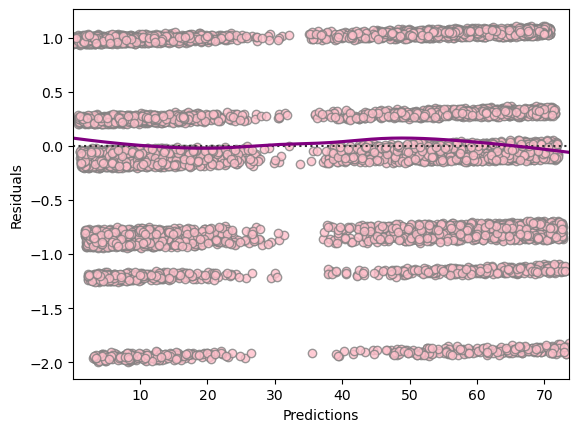

In [104]:
y_values = model_B.resid
x_values =  model_B.predict(X)


#res = df['Initial_days'] - x_values # checking calculation for .resid

#Establish dictionary for df
d = {'Residuals': y_values, 
     'Predictions': x_values, 
     #'Initial_days': df['Age']
     # Testing with data
    }

# Create dataframe to graph
resid_df = pd.DataFrame(data=d)


sns.residplot(
    x='Predictions',
    y='Residuals',
    data=resid_df,
    lowess=True, 
    scatter_kws={"edgecolor": "gray", "color": "pink"}, 
    line_kws={"color": "purple"}
)

plt.show()

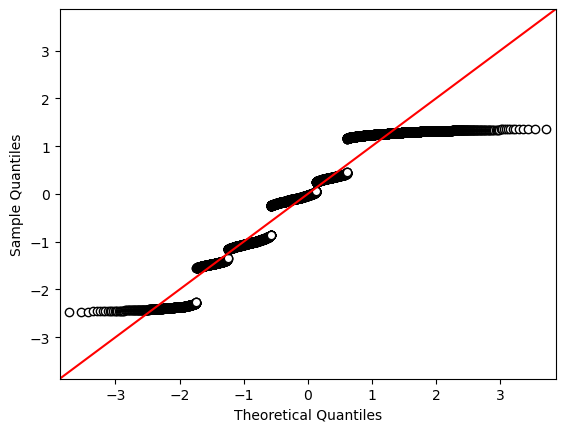

In [105]:
qqplot(data=model_B.resid, fit=True, markerfacecolor='white', markeredgecolor='black', line="45")
plt.show()

In [106]:
# Checking to see if residuals are not continuous and duplicated
model_B.resid.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [107]:
print('Largest values: {}'.format(model_B.resid.nlargest(10)))
print('Smallest values: {}'.format(model_B.resid.nsmallest(10)))

Largest values: 6731    1.107522
8663    1.104873
9292    1.103105
8560    1.102719
7413    1.100985
5016    1.100251
9876    1.099150
9444    1.096202
7949    1.092874
9545    1.092588
dtype: float64
Smallest values: 2286   -1.996872
2689   -1.993989
4032   -1.992500
3134   -1.991052
2694   -1.988102
4586   -1.987583
3713   -1.986554
2829   -1.983804
3003   -1.983390
3386   -1.983378
dtype: float64


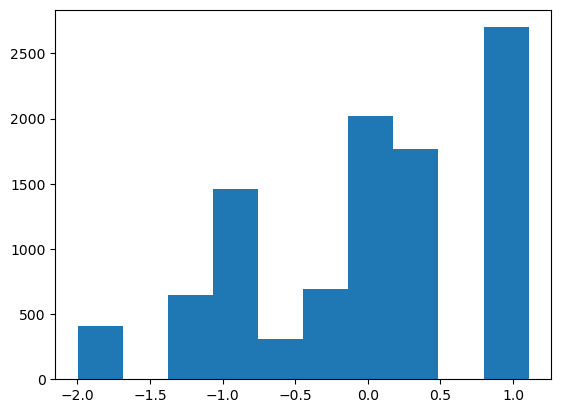

In [108]:
# Final Check for Normality 
plt.hist(model_B.resid)
plt.show()

QQ Plot does not show normal distribution. The points also look like horizontal bands, but the residuals are incremental. This tells us that the model violates the multivariate normality assumption.

In [110]:
# Model Without 'TotalCharge'
reduced_vars = df[['TotalCharge','Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'HighBlood_numeric', 'Arthritis_numeric', 'Diabetes_numeric',
       'BackPain_numeric', 'Reflux_esophagitis_numeric' ]]

y = df[['Initial_days']]
X = reduced_vars.assign(const=1)


model_noCharge = sm.OLS(y, X).fit()

print(model_noCharge.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.171e+06
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:26:11   Log-Likelihood:                -12075.
No. Observations:               10000   AIC:                         2.417e+04
Df Residuals:                    9990   BIC:                         2.424e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
TotalC

We see that Adj. R-squared plummets down to 0.001 and p-values become insignificant. This model and variables relies heavily on TotalCharge to predict Initial_days. If we want to look at patient demographic information and have the variables be statistically significant, we have to include TotalCharge in the model.